# **회귀 문제**

## 선형 회귀

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

### 데이터 불러오기

bike_sharing.csv는 매달 1일부터 19일까지의 자전거 임대 데이터를 저장하고 있습니다. 

**변수 설명** 

| 변수 | 설명 |
|------|------|
| datetime | year-month-day hour:minute:second 순으로 정리되어 있는 날짜 |
| season | 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 |
| holiday | 해당 날의 휴일 여부 (1 = 휴일, 0 = 휴일 아닌 날) |
| workingday | 주말도 휴일도 아닌 날 (1 = 일하는 날, 0 = 일 안하는 날) |  
| weather | 1 = 맑음 혹은 약간의 구름, 2 = 안개 혹은 구름, 3 = 약간의 눈/비와 천둥, 4 = 심한 눈/비, 천둥/번개 | 
| temp | 섭씨 온도 |
| atemp | 체감 온도(섭씨) |
| humidity | 상대 습도 |
| windspeed | 풍속 |
| casual | 미등록 사용자의 대여수 |
| registered | 등록 사용자의 대여수 |
| count | 대여 횟수(casual + registered) |


bike_sharing 데이터를 불러온 후 bike에 담아주세요. 

In [ ]:
from google.colab import files
files.upload()

Saving bike_sharing.csv to bike_sharing.csv


{'bike_sharing.csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.04,21.

In [ ]:
bike = pd.read_csv('bike_sharing.csv')

bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


column들의 data type을 확인해주세요.

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


1) object type인 datetime을 datetime 형으로 전환해봅시다.

2) 또 각각의 년, 월, 일, 시 정보를 추출하여 bike의 column(year, month, day, hour)으로 만들어주세요. 



In [ ]:
# datetime 형으로 전환 
bike['datetime'] = bike.datetime.apply(pd.to_datetime)

# 년, 월, 일, 시를 bike의 column으로 
bike['year'] = bike.datetime.apply(lambda x : x.year)
bike['month'] = bike.datetime.apply(lambda x : x.month)
bike['day'] = bike.datetime.apply(lambda x : x.day)
bike['hour'] = bike.datetime.apply(lambda x : x.hour)

In [ ]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


#### 필요없는 column 삭제하기 

bike에서 필요없는 'datetime', 'casual', 'registered'를 삭제해주세요.

In [ ]:
bike.drop(['datetime', 'casual', 'registered'], axis = 1, inplace = True)
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


#### 데이터를 feature와 target으로 나눠주세요. (target은 count, feature는 count를 제외한 나머지 변수들) 




In [ ]:
y = bike['count']
X = bike.drop(['count'], axis = 1, inplace = False)

#### 데이터를 훈련, 테스트 셋으로 나눠주세요. (test_size = 0.3, random_state = 42) 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### linearRegression을 통해 학습하고, score와 mae를 출력해주세요.


In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
r2 = lr.score(X_test, y_test)

y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print('R^2: ', r2)
print('MAE: ', mae)

R^2:  0.3867713333068157
MAE:  105.67593480324658


mae와 평가 데이터 점수가 너무 낮게 나타납니다. 

낮게 나오는 이유를 알아보겠습니다. 

#### 각 특징에 대한 회귀 계수의 시각화

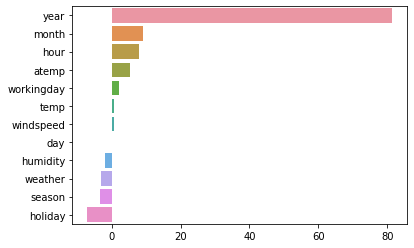

In [ ]:
coef = pd.Series(lr.coef_, index = X.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x= coef_sort.values, y = coef_sort.index)

그래프를 통해 year의 회귀 계수가 너무 큰 것을 확인할 수 있습니다. 

범주형 특징이지만 숫자형으로 되어있는 year 값을 학습에 바로 사용해서, 선형 회귀에서 문제가 발생한 것 같습니다. 따라서 원 핫 인코딩을 적용해서 특징들을 변환해주어야 합니다.

데이터 전처리(원 핫 인코딩, 스케일링)와 다항 회귀를 적용해서 더 좋은 결과를 보이는 모델을 만들어 보겠습니다. 

## 다항 회귀

### 데이터 전처리


#### 연속형, 범주형을 나눠서 생성 

범주형 변수 = 연속형 변수를 제외한 나머지 변수들 

연속형 변수 = 'temp', 'atemp', 'humidity', 'windspeed'

In [ ]:
# 범주형
x1 = bike[['season','holiday','workingday','weather','year','month','day','hour']]

# 연속형 
x2 = bike[['temp', 'atemp','humidity','windspeed']]

#### One-Hot Encoding

범주형 변수(x1)들을 원 핫 인코딩 해주세요. 

In [ ]:
x1_ohe = pd.get_dummies(x1, columns = ['season','holiday','workingday','weather','year','month','day','hour'])
x1_ohe.head()

,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 스케일링

연속형 데이터(x2)인 'temp', 'atemp', 'humidity', 'windspeed'를 Standardscaler를 사용하여 스케일링 해주세요. 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)

# x2_scaled를 데이터프레임 형태로 
x2_scaled = pd.DataFrame(x2_scaled, columns=['temp', 'atemp','humidity','windspeed'])
x2_scaled

,temp,atemp,humidity,windspeed
0,-1.333661,-1.092737,0.993213,-1.567754
1,-1.438907,-1.182421,0.941249,-1.567754
2,-1.438907,-1.182421,0.941249,-1.567754
3,-1.333661,-1.092737,0.681430,-1.567754
4,-1.333661,-1.092737,0.681430,-1.567754
...,...,...,...,...
10881,-0.596935,-0.467310,-0.617666,1.617227
10882,-0.702182,-0.735182,-0.253919,0.269704
10883,-0.807428,-0.913959,-0.046064,0.269704
10884,-0.807428,-0.735182,-0.046064,-0.832442


원 핫 인코딩과 스케일링한 데이터를 합쳐주세요.

In [ ]:
X = pd.concat([x1_ohe, x2_scaled], axis = 1)
X

,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,temp,atemp,humidity,windspeed
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,-1.333661,-1.092737,0.993213,-1.567754
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,-1.438907,-1.182421,0.941249,-1.567754
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,-1.438907,-1.182421,0.941249,-1.567754
3,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,-1.333661,-1.092737,0.681430,-1.567754
4,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,-1.333661,-1.092737,0.681430,-1.567754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,0,0,1,1,0,0,1,1,0,...,0,1,0,0,0,0,-0.596935,-0.467310,-0.617666,1.617227
10882,0,0,0,1,1,0,0,1,1,0,...,0,0,1,0,0,0,-0.702182,-0.735182,-0.253919,0.269704
10883,0,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,0,-0.807428,-0.913959,-0.046064,0.269704
10884,0,0,0,1,1,0,0,1,1,0,...,0,0,0,0,1,0,-0.807428,-0.735182,-0.046064,-0.832442


#### 원 핫 인코딩과 스케일링이 적용된 데이터를 훈련, 테스트 셋으로 나눠주세요. (test_size = 0.3, random_state = 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 원 핫 인코딩과 스케일링을 한 데이터로 선형 회귀

score와 mae를 출력해주세요.

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
r2 = lr.score(X_test, y_test)

y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print('R^2: ', r2)
print('MAE: ', mae)

R^2:  0.6795290404520047
MAE:  75.50581751377833


#### 원 핫 인코딩과 스케일링을 한 데이터로 다항 회귀 (PolynomialFeatures 사용) 

score와 mae를 출력해주세요.




In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

lr.fit(X_train_poly, y_train)
r2 = lr.score(X_test_poly, y_test)

y_pred = lr.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)

print('R^2: ', r2)
print('MAE: ', mae)

R^2:  0.9042323845716652
MAE:  40.01561543172076


##로지스틱 회귀

###데이터 불러오기

glass.csv는 성분에 따라 유리 종류를 분류한 dataset입니다.

In [ ]:
from google.colab import files
files.upload()

Saving glass.csv to glass.csv


{'glass.csv': b'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type\r\n1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1\r\n1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1\r\n1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1\r\n1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1\r\n1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1\r\n1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1\r\n1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1\r\n1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1\r\n1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1\r\n1.51755,13,3.6,1.36,72.99,0.57,8.4,0,0.11,1\r\n1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0,0.24,1\r\n1.51763,12.8,3.66,1.27,73.01,0.6,8.56,0,0,1\r\n1.51589,12.88,3.43,1.4,73.28,0.69,8.05,0,0.24,1\r\n1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0,0.17,1\r\n1.51763,12.61,3.59,1.31,73.29,0.58,8.5,0,0,1\r\n1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0,0,1\r\n1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0,0,1\r\n1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0,0,1\r\n1.51911,13.9,3.73,1.18,72.12,0.06,8.89,0,0,1\r\n1.51735,13.02,3.54,1.

In [ ]:
glass = pd.read_csv('glass.csv')

glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


###데이터 확인

(1) 데이터 정보 확인하기

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


(2) 반응 변수 'Type'의 각 항목들 확인하기

In [ ]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

(3) 결측치 확인하기

In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

###소프트맥스 회귀 모델

해당 데이터는 다중분류이기 때문에 소프트맥스 회귀 모델을 사용합니다.

####데이터 준비

'Type'을 제외한 column들을 X에, 'Type'을 y에 지정해주세요.

In [ ]:
X=glass.drop(['Type'], axis=1)
y=glass['Type']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

####회귀 모델

1) StandardScaler()->LogisticRegressionCV()으로 이어지는 pipeline을 만들어주세요. (max_iter=1000)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

lrCV=make_pipeline(StandardScaler(),LogisticRegressionCV(max_iter=1000))

lrCV.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregressioncv', LogisticRegressionCV(max_iter=1000))])

2) 분류결과 살펴보기

In [ ]:
#분류결과
prediction=lrCV.predict(X_test)
#분류확률
y_prob=lrCV.predict_proba(X_test)
np.set_printoptions(suppress=True)

print('분류결과')
print(prediction[:10].reshape(-1,1))
print('분류확률')
print(y_prob[:10])

분류결과
[[1]
 [7]
 [1]
 [7]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]]
분류확률
[[0.62107435 0.35788136 0.01974975 0.00123731 0.00000437 0.00005286]
 [0.         0.00000126 0.         0.00003567 0.00127789 0.99868517]
 [0.81622347 0.13825307 0.04552071 0.00000265 0.00000009 0.00000001]
 [0.00000004 0.00003832 0.         0.00097471 0.00140879 0.99757813]
 [0.05937267 0.7126068  0.16788796 0.02513012 0.00250785 0.0324946 ]
 [0.23454025 0.7191124  0.0129574  0.03330988 0.00007995 0.00000012]
 [0.75606806 0.22792261 0.01415961 0.00084919 0.00026339 0.00073714]
 [0.52175852 0.32585295 0.10077428 0.00433737 0.04353376 0.00374312]
 [0.4908058  0.43253358 0.05746709 0.01377867 0.00084636 0.0045685 ]
 [0.48928032 0.46263051 0.04716362 0.00092549 0.00000001 0.00000005]]


####모델 평가하기

1) Classification Table으로 모델 예측력 평가하기

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=lrCV.predict(X_test)

class_table = confusion_matrix(y_test, y_pred)
print(class_table)

[[11  2  1  0  0  0]
 [ 6 13  0  0  1  1]
 [ 3  0  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  7]]


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision=precision_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')

print('정밀도: ', precision)
print('재현율: ', recall)
print('f1 score: ', f1)

정밀도:  0.7229166666666668
재현율:  0.7132936507936508
f1 score:  0.6942062861180508


2) Categorical Cross Entropy 

(1) 'Type'에 대한 One-Hot Encoding 진행 (우선 y_test를 dataframe으로 만들어주기)

In [ ]:
y_test=pd.DataFrame(y_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohencoder=OneHotEncoder()
ohencoder.fit(y_test)
oh_labels = ohencoder.transform(y_test)

oh_labels = oh_labels.toarray()
print(oh_labels[:10])

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


(2) Categorial Cross Entropy Loss 계산

$ L = -\frac{1}{N} \sum_{j=1}^{N} \sum_{i=1}^{C} t_{ij} log(y_{ij}) $ \
($t_{ij}$ = 실제값, $y_{ij}$ = 예측값)

In [ ]:
def cross_E(y_true, y_pred):                 # CE
    return -np.sum(y_true * np.log(y_pred + 10**-100))/len(y_true)

In [ ]:
cross_E(oh_labels, y_prob)

0.7998071199444227

# 서포트 벡터 머신(Support Vector Machines)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn import datasets

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

## Linear SVC

### **breast_cancer 데이터를 불러온 후 DataFrame으로 저장하세요.**

In [ ]:
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data , columns = cancer.feature_names)
cancer_df['degree'] = cancer.target

**head() 확인해주세요.**

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,degree
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**target 데이터인 degree 칼럼의 구성을 확인해주세요.**

In [ ]:
np.unique(cancer_df['degree'])
# 0은 양성, 1은 악성

array([0, 1])

### **표준화를 진행하겠습니다.**

SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임.

In [ ]:
SS = StandardScaler()
cancer_SS = SS.fit_transform(cancer.data)

### **X = 표준화된 데이터, y = 타겟 데이터를 넣어주세요.**

In [ ]:
X = cancer_SS
y = cancer_df['degree']

### **train_test_split을 이용하여 데이터를 나눠주세요.**

y 클래스 비율에 맞추어 나누어주세요.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

### **선형 서포트 벡터 분류기를 만듭니다.**

파라미터 C는 허용되는 오류의 양을 조절합니다.

C 값을 1000으로 크게 주어 hard margin으로 지정하겠습니다.

In [ ]:
svc = SVC(kernel = 'linear', C=1000, random_state=42) #0.1, 1, 100
svc.fit(X_train, y_train)


print('Linear 학습 데이터 점수: {}'.format(svc.score(X_train, y_train)))
print('Linear 평가 데이터 점수: {}'.format(svc.score(X_test, y_test)))

Linear 학습 데이터 점수: 1.0
Linear 평가 데이터 점수: 0.9370629370629371


### **시각화를 위해 그리드 포인트와 contour 함수를 정의하겠습니다.**




In [ ]:
# 시각화를 위해 그리드 포인트 행렬 만들기
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
  return xx, yy
  
# 등고선을 색깔로 표시하기(contourf)
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

### **TSNE를 통하여 2차원으로 차원축소를 진행하겠습니다.**

In [ ]:
X_comp = TSNE(n_components=2, random_state=42).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


### **데이터가 선을 통하여 분리가 된 것을 확인할 수 있습니다.**


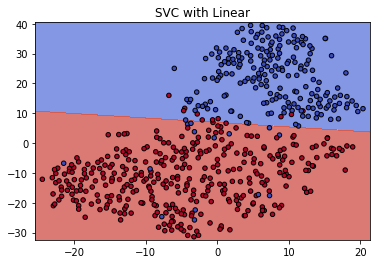

In [ ]:
svc.fit(X_comp, y)

plot_contours(svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('SVC with Linear');

## Kernel SVC

### **iris 데이터를 불러오겠습니다.**

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:, :2] # 두 특성만 사용
y = iris.target

### **입력 데이터를 표준화하겠습니다.**

In [ ]:
SS = StandardScaler()
X_ss = SS.fit_transform(X)

**DataFrame 형태로 만들고 head()를 출력하겠습니다.**

In [ ]:
data = pd.DataFrame(data = X_ss, columns = ['sepal length','sepal width'])
data['target'] = iris['target']
data.head()

,sepal length,sepal width,target
0,-0.900681,1.019004,0
1,-1.143017,-0.131979,0
2,-1.385353,0.328414,0
3,-1.506521,0.098217,0
4,-1.021849,1.249201,0


### **데이터에 대하여 2차원 상에 시각화를 진행하겠습니다.**

x='sepal length', y='sepal width', hue='target'

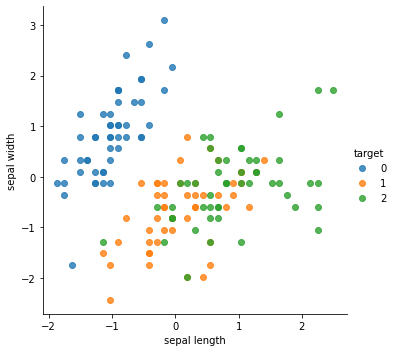

In [ ]:
# 데이터에 대하여 2차원 상에 시각화
sns.lmplot(x='sepal length', y='sepal width', hue='target', data=data, fit_reg=False)
plt.xlabel('sepal length')
plt.ylabel('sepal width');

**train_test_split을 이용하여 데이터를 나눠주세요.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, random_state = 42)

In [ ]:
X0, X1 = X_ss[:, 0], X_ss[:, 1]
xx, yy = make_meshgrid(X0, X1)

### **선형 서포트 벡터 분류기를 만듭니다.**

(probability=True, C=10, random_state=42)

Linear 학습 데이터 점수: 0.8035714285714286
Linear 평가 데이터 점수: 0.8421052631578947


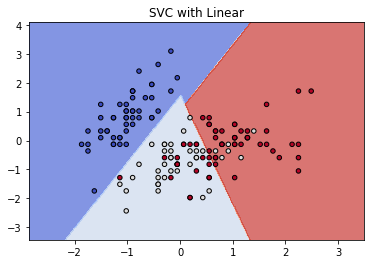

In [ ]:
svc = SVC(kernel = 'linear', probability=True, C=10, random_state=42) #0.1, 1, 100
svc.fit(X_train, y_train)

print('Linear 학습 데이터 점수: {}'.format(svc.score(X_train, y_train)))
print('Linear 평가 데이터 점수: {}'.format(svc.score(X_test, y_test)))

svc.fit(X_ss, y)

plot_contours(svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('SVC with Linear');

**새로운 샘플을 통하여 예측 확률을 확인합니다.**

SVC 클래스를 사용할 때 probability=True로 지정하여 모델을 훈련하면 predict_proba 메서드에서 보정된 확률을 확인 가능

In [ ]:
new_observation = [[.4, .4]]
svc.predict_proba(new_observation)

array([[0.0328139 , 0.45998807, 0.50719803]])

### **Polynomial 서포트 벡터 분류기를 만듭니다.**

(degree=3, C=10, random_state=42)

Polinomial 학습 데이터 점수: 0.7678571428571429
Polinomial 평가 데이터 점수: 0.7631578947368421


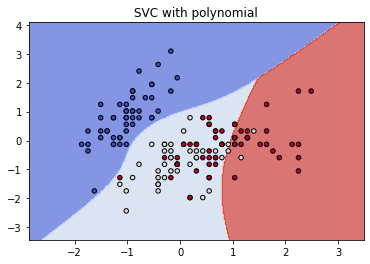

In [ ]:
svc_poly = SVC(kernel = 'poly', degree=3, C=10, random_state=42)
svc_poly.fit(X_train, y_train)

print('Polinomial 학습 데이터 점수: {}'.format(svc_poly.score(X_train, y_train)))
print('Polinomial 평가 데이터 점수: {}'.format(svc_poly.score(X_test, y_test)))
svc_poly.fit(X_ss, y)

plot_contours(svc_poly, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('SVC with polynomial');

### **Radial Bias Function 서포트 벡터 분류기를 만듭니다.**

파라미터 gamma는 결정경계를 얼마나 유연하게 그을 것인지 정해줍니다.

(degree=3, C=10, gamma='scale', random_state=42)

RBF 학습 데이터 점수: 0.7946428571428571
RBF 평가 데이터 점수: 0.8157894736842105


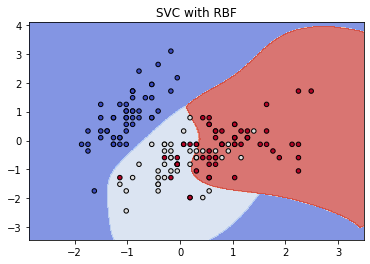

In [ ]:
svc_rbf = SVC(kernel = 'rbf', C=10, gamma = 'scale', random_state=42)
svc_rbf.fit(X_train, y_train)

print('RBF 학습 데이터 점수: {}'.format(svc_rbf.score(X_train, y_train)))
print('RBF 평가 데이터 점수: {}'.format(svc_rbf.score(X_test, y_test)))

svc_rbf.fit(X_ss, y)

plot_contours(svc_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('SVC with RBF');

**정확도(accuracy_score)를 확인하겠습니다.**

In [ ]:
y_pred = svc.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.8421052631578947


## 하이퍼파라미터 튜닝

### **Small gamma**

**gamma 값을 0.5로 작게 주어 변화를 관찰해보겠습니다.**

RBF 학습 데이터 점수: 0.7946428571428571
RBF 평가 데이터 점수: 0.8157894736842105


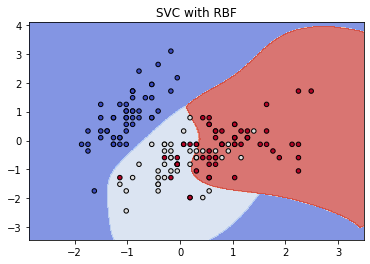

In [ ]:
svc_rbf = SVC(kernel = 'rbf', degree=3, C=10, gamma = 0.5, random_state=42)
svc_rbf.fit(X_train, y_train)

print('RBF 학습 데이터 점수: {}'.format(svc_rbf.score(X_train, y_train)))
print('RBF 평가 데이터 점수: {}'.format(svc_rbf.score(X_test, y_test)))

svc_rbf.fit(X_ss, y)

plot_contours(svc_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('SVC with RBF');

### **Large gamma**

**gamma 값을 5로 크게 주어 변화를 관찰해보겠습니다.**

RBF 학습 데이터 점수: 0.8839285714285714
RBF 평가 데이터 점수: 0.7894736842105263


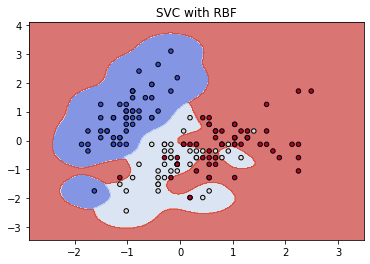

In [ ]:
svc_rbf = SVC(kernel = 'rbf', C=10, gamma = 5, random_state=42)
svc_rbf.fit(X_train, y_train)

print('RBF 학습 데이터 점수: {}'.format(svc_rbf.score(X_train, y_train)))
print('RBF 평가 데이터 점수: {}'.format(svc_rbf.score(X_test, y_test)))

svc_rbf.fit(X_ss, y)

plot_contours(svc_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('SVC with RBF');

### **사이킷런의 GridSearchCV 클래스를 이용하여 최적의 하이퍼파라미터 탐색**

In [ ]:
svc = SVC(random_state=42)
param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree': [2,3,5], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['rbf'], 'gamma': ['auto', 'scale'], 'C': [0.1, 1, 10, 100, 1000]}]

gs = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']}])

**best_estimator_ 속성에 가장 좋은 모델이 저장되어 있습니다.**

best_svc에 가장 좋은 모델을 저장합니다.

In [ ]:
best_svc = gs.best_estimator_

**그리드 서치로 찾은 최적의 매개변수는 best_params_ 속성에 저장되어 있습니다.**

In [ ]:
gs.best_params_

{'C': 1000, 'kernel': 'linear'}

**best_svc로 fit 해주고 점수를 출력합니다.**

In [ ]:
best_svc.fit(X_train, y_train)
print(best_svc.score(X_train, y_train))

0.8035714285714286


**정확도를 출력합니다.**

In [ ]:
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.8421052631578947


**classification_report를 출력하겠습니다.**

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.64      0.78      0.70         9
           2       0.83      0.71      0.77        14

    accuracy                           0.84        38
   macro avg       0.82      0.83      0.82        38
weighted avg       0.85      0.84      0.84        38



**예측값과 실제값을 DataFrame을 통해 확인하겠습니다.**

In [ ]:
# 예측값과 실제값의 일치 확인
comperision = pd.DataFrame({'prediction': y_pred, 'truth': y_test.ravel()})
comperision

,prediction,truth
0,1,1
1,0,0
2,2,2
3,1,1
4,2,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


# 수고하셨습니다!